# Package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors
import os
import package_DBR
import package_lab

from importlib import reload
package_DBR = reload(package_DBR)
package_lab = reload(package_lab)

from package_DBR import *
from package_lab import *

# LEAD_LAG()

In [2]:
help(LeadLag_RT)

Help on function LeadLag_RT in module package_lab:

LeadLag_RT(MV, Kp, Tlead, Tlag, Ts, PV, PVInit=0, method='EBD')
    The function "LEADLAG_RT" needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :Tlead: lead time constant [s]
    :Tlag: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



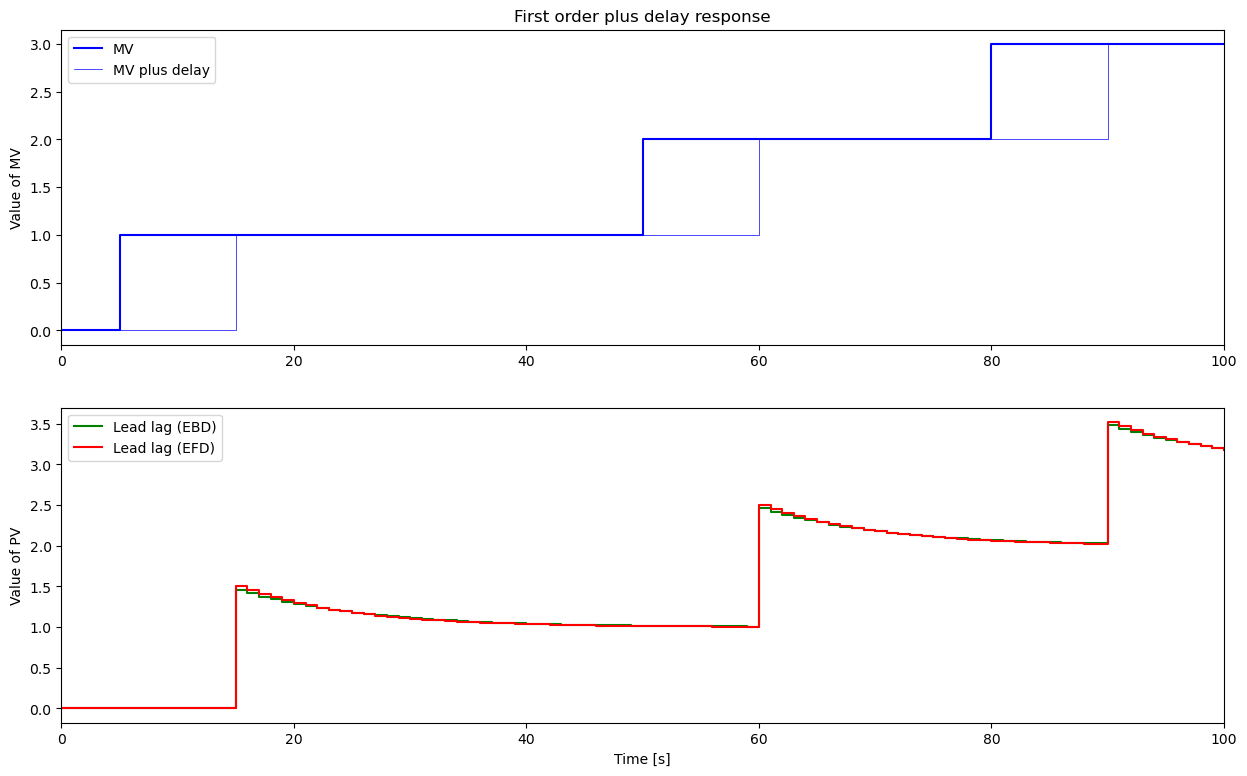

In [3]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []


# Parameters
Kp = 1
Tlag = 10
Tlead = 15
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD,0,'EBD')
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EFD,0,'EFD')
    LeadLag_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)

plt.step(t,PV_EBD,'g-',label='Lead lag (EBD)',where='post')
plt.step(t,PV_EFD,'r-',label='Lead lag (EFD)',where='post')
#plt.step(t,PV_TRAP,'y-',label='Lead lag (TRAP)',where='post') verifier

plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

nameFile = 'Plots/LeadLag'

if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
plt.savefig(nameFile + '.png',transparent=True)
plt.savefig(nameFile + '.pdf',transparent=True)    

 # PID_RT()

In [4]:
help(PID_RT)

Help on function PID_RT in module package_lab:

PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVmin, MVmax, MV, MVP, MVI, MVD, E, ManFF=False, PVinit=0, method='EBD-EBD')
    SP = setpoint vector
    PV = process value vector
    Man = manual controller mode vector : bool
    MVMan = Manual value for MV vector
    MVFF = feedforward vector
    Kc = controller gain
    Ti= integral time constant
    Td = derivative time constant
    alpha = Tfd = alpha*Td = where Tfd is derivative filter time constant
    
    MVMin = min value for MV
    MVMax = max value for MV
    
    MV = Maniplated value vector
    MVP = proportional part of MV vector
    MVI =  integral part of MV vector
    MVD = derivative part of MV vector
    E = control error vector
    
    ManFF = activated FF in manuel mode
    PVInit = initial value of PV
    Method : discreditisation value for PV
        EBD-EBD: Euler Backward difference
        TRAP-TRAP: Trapezoïdal method
    
    The function PID_RT appen

# PID avec méthode EBD

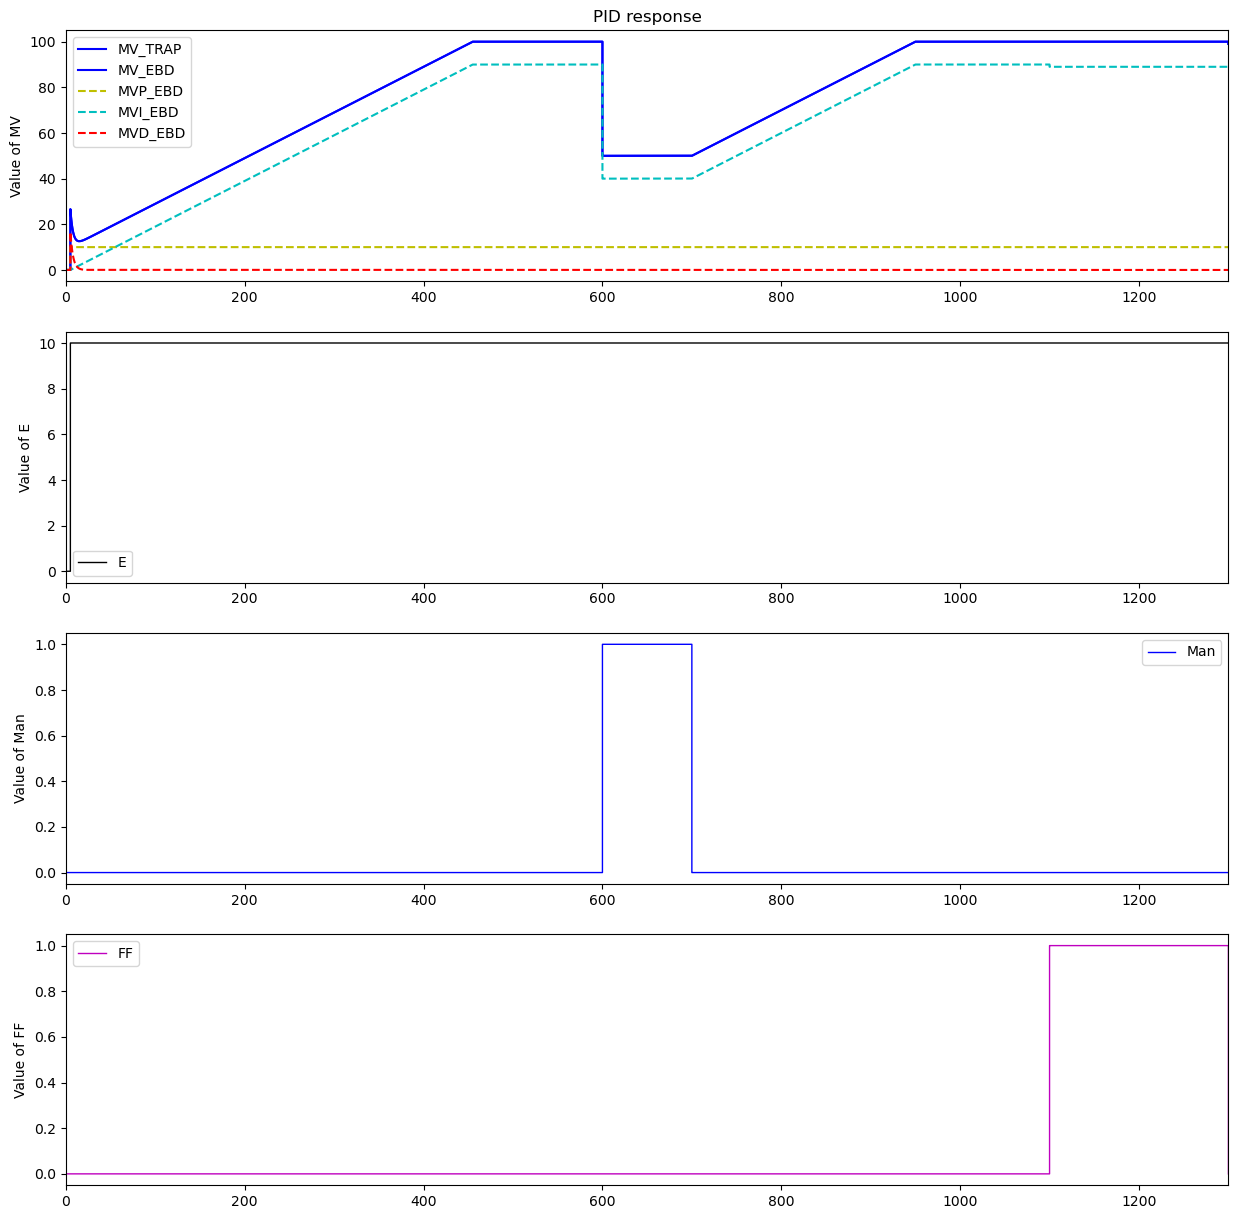

In [5]:
t = []

TSim = 1300


SP = []
MV = []
PV = []
DV =[]
Man = []
MVMan = []
MVFF = []
MVManPath = {0:50, TSim:50}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}


ManPath = {0: False, 600: True, 700:False, TSim : False}
MVFFPath = {0:0, 1100: True, TSim : False}

Kc = 1
Ti = 50
Td = 5
alpha = 0.6
Ts = 0.01
N = int(TSim/Ts) + 1
MVmin = 0 
MVmax = 100

MVP = []
MVI = []
MVD = [] 
E  = []
MVP2 = []
MVI2 = []
MVD2 = [] 


for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath, t,SP)
    SelectPath_RT(PVPath, t,PV)
    SelectPath_RT(ManPath, t,Man)
    SelectPath_RT(MVManPath, t,MVMan)
    SelectPath_RT(MVFFPath, t, MVFF)

    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVmin, MVmax, MV, MVP, MVI, MVD, E,False,0,"EBD-EBD")

plt.figure(figsize = (15,15))
plt.subplot(4,1,1)
plt.step(t,MV,'b-',label='MV_TRAP',where='post')
#plt.step(t,MVP,'y-',label='MVP_TRAP',where='post')
#plt.step(t,MVI,'g-',label='MVI_TRAP',where='post')
#plt.step(t,MVD,'r-',label='MVD_TRAP',where='post')
#plt.step(t,E ,'-m',linewidth=0.5,label='E_TRAP',where='post')

plt.step(t,MV,'b-',label='MV_EBD',where='post')
plt.step(t,MVP,'--y',label='MVP_EBD',where='post')
plt.step(t,MVI,'--c',label='MVI_EBD',where='post')
plt.step(t,MVD,'--r',label='MVD_EBD',where='post')
#plt.step(t,E2 ,'-m',linewidth=0.5,label='E_EBD',where='post')
#plt.step(t,SP ,'c--',linewidth=0.5,label='E',where='post')

plt.ylabel('Value of MV')
plt.title('PID response')
plt.legend(loc='best')
plt.xlim([0, TSim])

# E
plt.subplot(4,1,2)
plt.step(t,E ,'k-',linewidth=1,label='E',where='post')
plt.ylabel('Value of E')
plt.legend(loc='best')
plt.xlim([0, TSim])

# Man
plt.subplot(4,1,3)
plt.step(t,Man,'b-',linewidth=1,label='Man',where='post')
plt.ylabel('Value of Man')
plt.legend(loc='best')
plt.xlim([0, TSim])

# FF
plt.subplot(4,1,4)
plt.step(t,MVFF,'m-',linewidth=1,label='FF',where='post')
plt.ylabel('Value of FF')
plt.legend(loc='best')
plt.xlim([0, TSim])

nameFile = 'Plots/Step_Response_PID_EBD_alpha_influence'

if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
#plt.savefig(nameFile + '.png',transparent=True)
#plt.savefig(nameFile + '.pdf',transparent=True)  


# PID avec méthode des Trapèzes

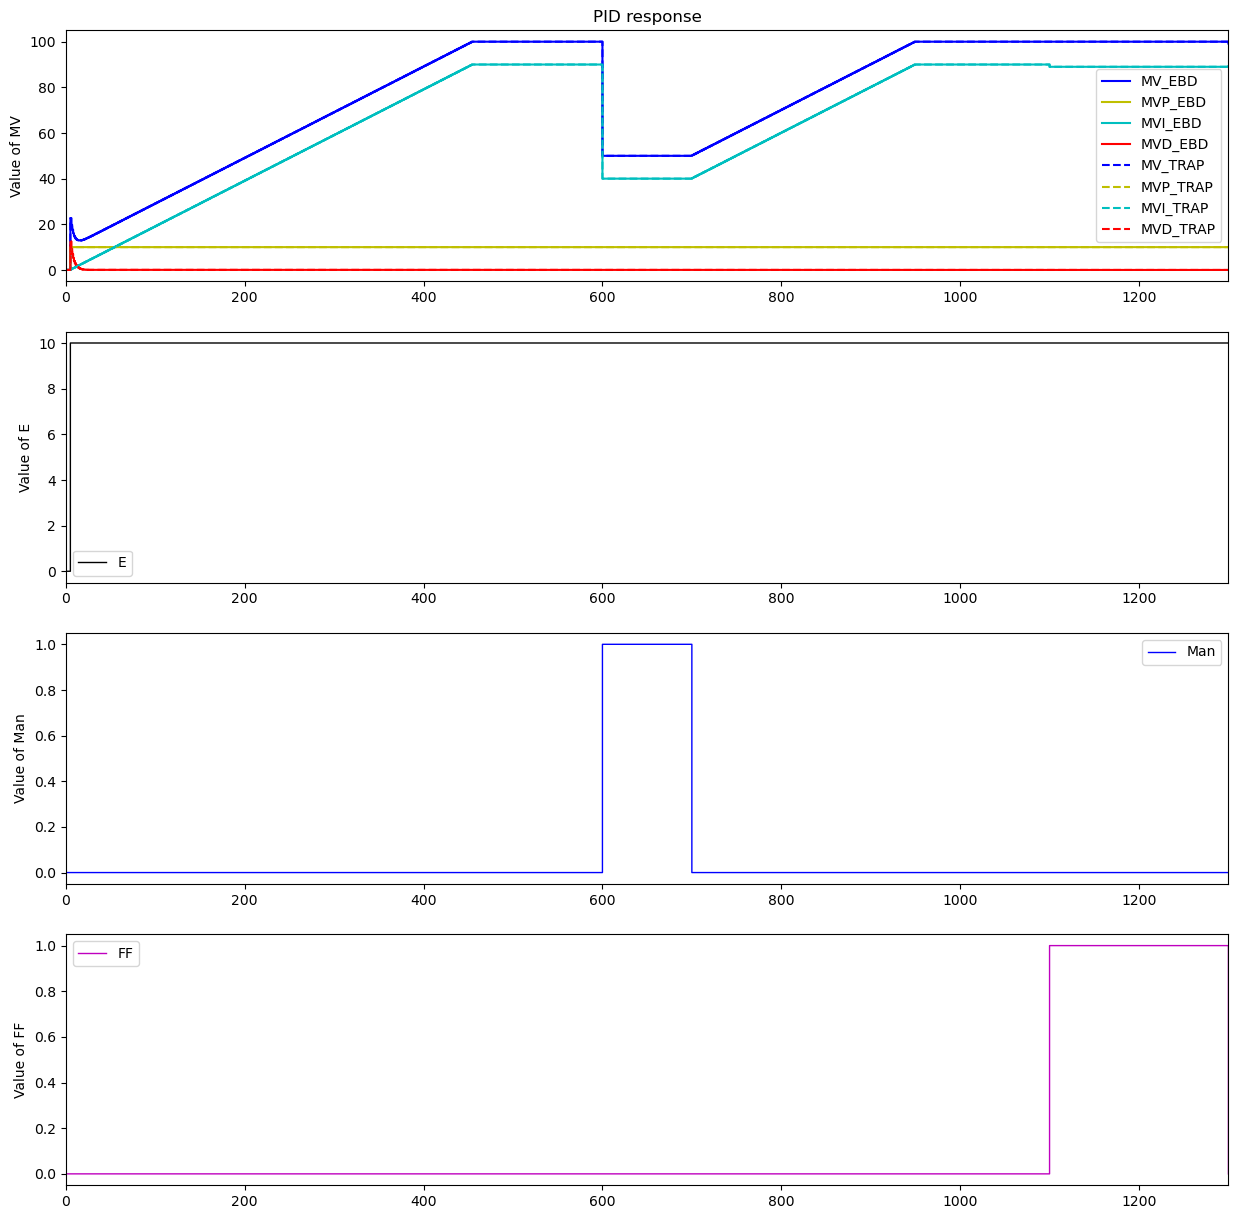

In [6]:
t = []

TSim = 1300


SP = []
SPTRAP =[]
MV = []
MVTRAP =[]
PV = []
PVTRAP = []
DV =[]
DVTRAP =[]
Man = []
MVMan = []
MVFF = []
MVManPath = {0:50, TSim:50}
SPPath = {0: 50, 5: 60, TSim : 60}
PVPath = {0:50, 5:50, TSim:50}


ManPath = {0: False, 600: True, 700:False, TSim : False}
MVFFPath = {0:0, 1100: True, TSim : False}

Kc = 1
Ti = 50
Td = 5
alpha = 0.6
Ts = 1 #0.01
N = int(TSim/Ts) + 1
MVmin = 0 
MVmax = 100

MVP = []
MVI = []
MVD = [] 
E  = []
MVPTRAP = []
MVITRAP = []
MVDTRAP = [] 
ETRAP  = []



for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath, t,SP)
    SelectPath_RT(PVPath, t,PV)
    SelectPath_RT(SPPath, t,SPTRAP)
    SelectPath_RT(PVPath, t,PVTRAP)
    SelectPath_RT(ManPath, t,Man)
    SelectPath_RT(MVManPath, t,MVMan)
    SelectPath_RT(MVFFPath, t, MVFF)

    PID_RT(SP, PV, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVmin, MVmax, MV, MVP, MVI, MVD, E,False,0,"EBD-EBD")
    PID_RT(SPTRAP, PVTRAP, Man, MVMan, MVFF, Kc, Ti, Td, alpha, Ts, MVmin, MVmax, MVTRAP, MVPTRAP, MVITRAP, MVDTRAP, ETRAP,False,0,'TRAP-TRAP')

plt.figure(figsize = (15,15))
plt.subplot(4,1,1)


plt.step(t,MV,'b-',label='MV_EBD',where='post')
plt.step(t,MVP,'y-',label='MVP_EBD',where='post')
plt.step(t,MVI,'c-',label='MVI_EBD',where='post')
plt.step(t,MVD,'r-',label='MVD_EBD',where='post')

plt.step(t,MVTRAP,'--b',label='MV_TRAP',where='post')
plt.step(t,MVPTRAP,'--y',label='MVP_TRAP',where='post')
plt.step(t,MVITRAP,'--c',label='MVI_TRAP',where='post')
plt.step(t,MVDTRAP,'--r',label='MVD_TRAP',where='post')

plt.ylabel('Value of MV')
plt.title('PID response')
plt.legend(loc='best')
plt.xlim([0, TSim])

# E
plt.subplot(4,1,2)
plt.step(t,E ,'k-',linewidth=1,label='E',where='post')
plt.ylabel('Value of E')
plt.legend(loc='best')
plt.xlim([0, TSim])

# Man
plt.subplot(4,1,3)
plt.step(t,Man,'b-',linewidth=1,label='Man',where='post')
plt.ylabel('Value of Man')
plt.legend(loc='best')
plt.xlim([0, TSim])

# FF
plt.subplot(4,1,4)
plt.step(t,MVFF,'m-',linewidth=1,label='FF',where='post')
plt.ylabel('Value of FF')
plt.legend(loc='best')
plt.xlim([0, TSim])

nameFile = 'Plots/Step_Response_PID_TRAP'

if not os.path.exists('Plots'):
    os.makedirs('Plots')
    
#plt.savefig(nameFile + '.png',transparent=True)
#plt.savefig(nameFile + '.pdf',transparent=True)  


# IMCTuning()

In [7]:
help(IMCTuning)

Help on function IMCTuning in module package_lab:

IMCTuning(K, Tlag1, Tlag2=0, theta=0, gamma=0.5, process='FOPDT-PI')
    IMCTuning computes the IMC PID tuning parameters for FOPDT and SOPDT processes.
    K: process gain (Kp)
    Tlag1: first (main) lag time constant [s]
    Tlag2: second lag time constant [s]
    theta: delay [s]
    gamma: used to computed the desired closed loop time constant Tclp [s] (range [0.2 -> 0.9])
    process:
        FOPDT-PI: First Order Plus Dead Time for P-I control (IMC tuning case G)
        FOPDT-PID: First Order Plus Dead Time for P-I-D control (IMC tuning case H)
        SOPDT :Second Order Plus Dead Time for P-I-D control (IMC tuning case I)
        
    return : PID controller parameters Kc, Ti and Td



In [8]:
# Parameters for input-output dynamic
Kp = 0.42
T1p = 119 
T2p = 6 
thetap = 6 

# Parameters PID controller
gamma = 0.6                                # A faire : Discuter variation de gamma
Kc, Ti, Td = IMCTuning(Kp,T1p,T2p,thetap,gamma, 'SOPDT')

print("Kc = ",Kc)
print("Ti = ",Ti)
print("Td = ",Td)

Kc =  3.8452073335794275
Ti =  125
Td =  5.712


# Margin()

In [9]:
help(Margin)

Help on function Margin in module package_lab:

Margin(Ps, C, omega, Show=True)
    Calcule la marge de gain et la marge de phase. Elles nous permettent d'analyser la robustesse du PID.
    :Ps : Process
    :C: Fonction de transfert du Contrôleur 
    :omega : vecteur de la fréquence 
    :show : autorise l'affichage graphique



In [10]:
P = Process({})

Kp = 0.42
Tlag1 = 93.5
Tlag2 = 0
theta = 7.4
T1p = 119 # Tg
T2p = 6 # Tu

P.parameters['Kp'] = Kp
P.parameters['Tlag1'] = Tlag1
P.parameters['Tlag2'] = Tlag2
P.parameters['theta'] = theta

Kc, Ti, Td = IMCTuning(Kp,T1p,T2p,thetap,gamma, 'SOPDT')

C = PID({})
C.parameters['Kc'] = Kc
C.parameters['Ti'] = Ti
C.parameters['Td']= Td
C.parameters['Tfd'] = alpha *Td # temps dérivation après filtrage


omega = np.logspace(-3,1,10000)

Ps = Bode(P,omega,Show=False)

Margin(Ps,C,omega)

NameError: name 'PID' is not defined